# Multi-membership data without outliers

In this notebook, we show that RTKM performs competitively with existing methods on multi-membership data without outliers. 

In [1]:
from RTKM import *
from ClusteringMethods import *
from AccuracyMeasures import *

import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.decomposition import PCA

# Yeast Dataset

Load the yeast dataset.  Data can be found at: http://mulan.sourceforge.net/datasets-mlc.html . This dataset contains 1500 instances with 103 numerical attributes. There are 14 classes, and the cardinality of the dataset is 4.237. 

In [2]:
data = arff.loadarff('datasets/yeast/yeast-train.arff')
df = pd.DataFrame(data[0])
array = df.to_numpy()
data = np.array(array[:, :-14], dtype = float)
data = data.T
labels = np.array(array[:, -14:], dtype = float)
labels = labels.T

Use PCA to visualize the Yeast data against its first two principle components. 

Text(0.5, 1.0, 'Yeast Dataset Visualized Against Top 2 Principle Components')

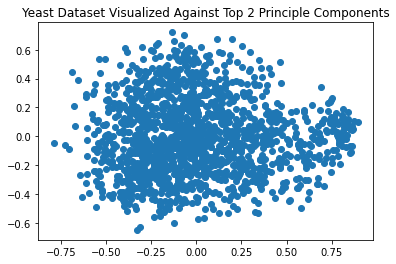

In [3]:
pca = PCA(n_components=3)
pca.fit(data.T)
Xnew = pca.transform(data.T)
Xnew = Xnew.T

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.title('Yeast Dataset Visualized Against Top 2 Principle Components')


Load best initial centers for each method.

In [8]:
with open('saved_centers/centersRecord.npy', 'rb') as f:
    centers_record= np.load(f)



# Run RTKM 

Run Robust Trimmed k Means on the yeast dataset with $k=14$, $\alpha = 0$, and $s = 4$.  Return Accuracy Metrics for RTKM. 

In [5]:
RTKM_yeast = RTKM(data)
RTKM_yeast.perform_clustering(k=14, percent_outliers = 0, max_iter = 1000, num_members = 4, init_centers = centers_record[:,:,4].T)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = RTKM_yeast.weights, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))




Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations


 Number of true positives:  [207, 260, 303, 212, 145, 129, 107, 109, 12, 40, 65, 416, 383, 2] 

 Number of false positives :  [263, 231, 254, 169, 153, 299, 343, 370, 286, 328, 432, 152, 127, 289] 

 Number of true negatives:  [761, 624, 648, 799, 906, 823, 896, 841, 1116, 1011, 870, 220, 257, 1190] 

 Number of false negatives:  [269, 385, 295, 320, 296, 249, 154, 180, 86, 121, 133, 712, 733, 19] 

 F1 scores for each cluster:  [0.43763214 0.45774648 0.52467532 0.46440307 0.39242219 0.32009926
 0.30098453 0.28385417 0.06060606 0.15122873 0.18705036 0.49056604
 0.47109471 0.01282051] 

 Average F1 score:  0.3253702545844944


# Run KMOR

Run KMOR on the Yeast dataset with $k=9$, $\alpha = 0$, and $\gamma = 9$ and return accuracy metrics.

In [6]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=14, percent_outliers= 0, gamma = 9, init_centers = centers_record[:,:,2].T)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_KMOR, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))





 Number of true positives:  [67, 65, 78, 58, 79, 49, 35, 21, 7, 15, 20, 100, 107, 1] 

 Number of false positives :  [67, 25, 56, 34, 11, 40, 100, 92, 69, 93, 99, 20, 20, 72] 

 Number of true negatives:  [957, 830, 846, 934, 1048, 1082, 1139, 1119, 1333, 1246, 1203, 352, 364, 1407] 

 Number of false negatives:  [409, 580, 520, 474, 362, 329, 226, 268, 91, 146, 178, 1028, 1009, 20] 

 F1 scores for each cluster:  [0.21967213 0.17687075 0.21311475 0.18589744 0.29755179 0.20985011
 0.17676768 0.10447761 0.08045977 0.11152416 0.12618297 0.16025641
 0.17216412 0.0212766 ] 

 Average F1 score:  0.16114759131039227


# Run Neo-k-means
Run NEO k means with $k = 9$, $\alpha = 0$, and $\beta = 3$ on the Yeast dataset and return accuracy metrics. 

In [8]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_NEO='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=14, percent_outliers=0, sigma= 3, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_NEO, membership_option = 'multi')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))




    _pyeval at line 57 column 30

***** iteration: 1, objective: 5472.990634
***** iteration: 2, objective: 5252.847959
***** iteration: 3, objective: 5179.509872
***** iteration: 4, objective: 5130.984610
***** iteration: 5, objective: 5101.645687
***** iteration: 6, objective: 5085.169288
***** iteration: 7, objective: 5068.368243
***** iteration: 8, objective: 5052.528203
***** iteration: 9, objective: 5044.426341
***** iteration: 10, objective: 5041.597958
***** iteration: 11, objective: 5040.029442
***** iteration: 12, objective: 5039.143976
***** iteration: 13, objective: 5038.453421
***** iteration: 14, objective: 5037.959406
***** iteration: 15, objective: 5037.720000
***** iteration: 16, objective: 5037.465264
***** iteration: 17, objective: 5037.306882
***** iteration: 18, objective: 5037.083004
***** iteration: 19, objective: 5036.831682
***** iteration: 20, objective: 5036.642766
***** iteration: 21, objective: 5036.536763
***** iteration: 22, objective: 5036.464424
***** i

# Scene Dataset

Load the scene dataset from http://mulan.sourceforge.net/datasets-mlc.html.  Dataset contains 1211 instances with 294 numerical attributes each. There are 6 classes and the cardinality of the dataset is 1.074.

In [2]:
data = arff.loadarff('datasets/scene/scene-train.arff')
df = pd.DataFrame(data[0])
array = df.to_numpy()
data = np.array(array[:, :-6], dtype = float)
data = data.T
labels = np.array(array[:, -6:], dtype = float)
labels = labels.T

Use PCA to visualize the Scene dataset against it's top 2 principle components.

Text(0.5, 1.0, 'Scene Dataset Visualized Against Top 2 Principle Components')

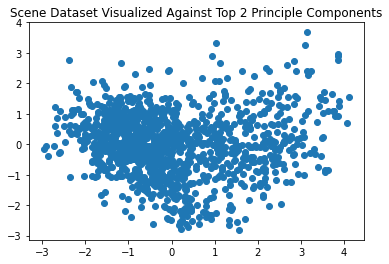

In [3]:
pca = PCA(n_components=2)
pca.fit(data.T)
Xnew = pca.transform(data.T)
Xnew = Xnew.T

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.title('Scene Dataset Visualized Against Top 2 Principle Components')



Load the best initial centers for each method.

In [9]:
with open('saved_centers/centerRecordScene.npy', 'rb') as f:
    centers_record_scene= np.load(f)

Run RTKM with $k = 6$, $\alpha = 0$, and $s = 1$.  Return accuracy metrics.

In [5]:
RTKM_yeast = RTKM(data)
RTKM_yeast.perform_clustering(k=6, percent_outliers = 0, max_iter = 1000, num_members = 1, init_centers = centers_record_scene[:,:,1].T)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = RTKM_yeast.weights, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))





Iteration 100
Iteration 200
Iteration 300
Iteration 400


 Number of true positives:  [114, 98, 147, 150, 124, 88] 

 Number of false positives :  [116, 23, 36, 53, 193, 69] 

 Number of true negatives:  [868, 1023, 978, 962, 741, 918] 

 Number of false negatives:  [113, 67, 50, 46, 153, 136] 

 F1 scores for each cluster:  [0.49890591 0.68531469 0.77368421 0.7518797  0.41750842 0.46194226] 

 Average F1 score:  0.5982058629852778


Run KMOR with $k=6$, $\alpha = 0$, and $\gamma = 9$.  Return accuracy metrics.

In [6]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=6, percent_outliers= 0, gamma = 9, init_centers = centers_record_scene[:,:,2].T)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_KMOR, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))






 Number of true positives:  [115, 105, 132, 152, 129, 88] 

 Number of false positives :  [114, 28, 24, 66, 166, 92] 

 Number of true negatives:  [870, 1018, 990, 949, 768, 895] 

 Number of false negatives:  [112, 60, 65, 44, 148, 136] 

 F1 scores for each cluster:  [0.50438596 0.70469799 0.74787535 0.73429952 0.45104895 0.43564356] 

 Average F1 score:  0.5963252229851184


Run NEO k means with $k=6$, $\alpha = 1$, and $\beta = 0$. 

In [7]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_NEO='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=6, percent_outliers=0, sigma = 1, init_centers = centers_record_scene[:,:,2].T)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_NEO, membership_option = 'multi')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))





    _pyeval at line 57 column 30

***** iteration: 1, objective: 16762.680384
***** iteration: 2, objective: 15545.697559
***** iteration: 3, objective: 15435.754616
***** iteration: 4, objective: 15382.244334
***** iteration: 5, objective: 15347.021161
***** iteration: 6, objective: 15308.981940
***** iteration: 7, objective: 15273.099709
***** iteration: 8, objective: 15244.927613
***** iteration: 9, objective: 15230.482215
***** iteration: 10, objective: 15224.067299
***** iteration: 11, objective: 15221.148162
***** iteration: 12, objective: 15219.905407
***** iteration: 13, objective: 15219.556360
***** iteration: 14, objective: 15219.294171
***** iteration: 15, objective: 15219.193788
***** iteration: 16, objective: 15218.997890
***** iteration: 17, objective: 15218.530082
***** iteration: 18, objective: 15218.287291
***** iteration: 19, objective: 15218.194798
***** iteration: 20, objective: 15218.156743
***** iteration: 21, objective: 15218.156743
***** No. of iterations done: 

In [3]:
# np.save('alpha_vals_yeast', alpha_vals)

# np.save('rand_index_avg_RTKM_yeast', avg_rand_index_RTKM)
# np.save('rand_index_avg_KMOR_yeast', avg_rand_index_KMOR)
# np.save('rand_index_avg_NEO_yeast', avg_rand_index_NEO)

# np.save('Me_avg_RTKM_yeast', Me_avg_RTKM)
# np.save('Me_avg_KMOR_yeast', Me_avg_KMOR)
# np.save('Me_avg_NEO_yeast', Me_avg_NEO)

# np.save('f1_avg_RTKM_yeast', f1_scores_avg_RTKM)
# np.save('f1_avg_KMOR_yeast', f1_scores_avg_KMOR)
# np.save('f1_avg_NEO_yeast', f1_scores_avg_NEO)

# np.save('min_RTKM', min_RTKM)
# np.save('max_RTKM', max_RTKM)

# np.save('min_KMOR', min_KMOR)
# np.save('max_KMOR', max_KMOR)

# np.save('min_NEO', min_NEO)
# np.save('max_NEO', max_NEO)

#### TAKE 2

# np.save('Me_avg_RTKM_yeast2', Me_avg_RTKM)
# np.save('Me_avg_KMOR_yeast2', Me_avg_KMOR)
# np.save('Me_avg_KMOR_yeast1_2', Me_avg_KMOR_1)
# np.save('Me_avg_NEO_yeast2', Me_avg_NEO)

# np.save('f1_avg_RTKM_yeast2', f1_scores_avg_RTKM)
# np.save('f1_avg_KMOR_yeast2', f1_scores_avg_KMOR)
# np.save('f1_avg_KMOR_yeast1_2', f1_scores_avg_KMOR_1)
# np.save('f1_avg_NEO_yeast2', f1_scores_avg_NEO)

# np.save('min_RTKM2', min_RTKM)
# np.save('max_RTKM2', max_RTKM)

# np.save('min_KMOR2', min_KMOR)
# np.save('max_KMOR2', max_KMOR)

# np.save('min_KMOR_1_2', min_KMOR_1)
# np.save('max_KMOR_1_2', max_KMOR_1)

# np.save('min_NEO2', min_NEO)
# np.save('max_NEO2', max_NEO)

alpha_vals = np.linspace(0, .20, 11) 


Me_avg_RTKM = np.load('Me_avg_RTKM_yeast2.npy')
Me_avg_KMOR= np.load('Me_avg_KMOR_yeast2.npy')
Me_avg_KMOR_1 = np.load('Me_avg_KMOR_yeast1_2.npy')
Me_avg_NEO = np.load('Me_avg_NEO_yeast2.npy')

f1_scores_avg_RTKM = np.load('f1_avg_RTKM_yeast2.npy')
f1_scores_avg_KMOR = np.load('f1_avg_KMOR_yeast2.npy')
f1_scores_avg_KMOR_1 = np.load('f1_avg_KMOR_yeast1_2.npy')
f1_scores_avg_NEO = np.load('f1_avg_NEO_yeast2.npy')

min_RTKM = np.load('min_RTKM2.npy')
max_RTKM = np.load('max_RTKM2.npy')

min_KMOR = np.load('min_KMOR2.npy')
max_KMOR = np.load('max_KMOR2.npy')

min_KMOR_1 = np.load('min_KMOR_1_2.npy')
max_KMOR_1 = np.load('max_KMOR_1_2.npy')

min_NEO = np.load('min_NEO2.npy')
max_NEO = np.load('max_NEO2.npy')





# Yeast noise RTKM

Iteration 100
PALM reached maximum number of iterations


Text(0.5, 1.0, 'PALM Trimmed for K-Means Clustering')

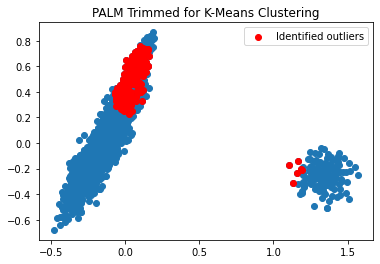

In [25]:
RTKM_yeast = RTKM(data_out.T)
RTKM_yeast.perform_clustering(k=14, percent_outliers = 0.10, max_iter = 100, num_members = 4) 
pred_clusters, pred_outliers = RTKM_yeast.return_clusters()


plt.figure()
plt.scatter(Xnew_out[0,:], Xnew_out[1,:])
plt.scatter(Xnew_out[0,pred_outliers], Xnew_out[1,pred_outliers], c = 'r', label = 'Identified outliers')
# plt.scatter(RTKM_yeast.centers[0,:], RTKM_yeast.centers[1,:], c = 'b', label = 'Calculated Centers')
plt.legend()
plt.title('PALM Trimmed for K-Means Clustering')
#plt.savefig('MyMethodTrimmed')



# Yeast Noise NEO

    _pyeval at line 57 column 30

***** iteration: 1, objective: 6315.116888
***** iteration: 2, objective: 5887.058410
***** iteration: 3, objective: 5791.944541
***** iteration: 4, objective: 5738.651267
***** iteration: 5, objective: 5706.741951
***** iteration: 6, objective: 5689.816019
***** iteration: 7, objective: 5680.515528
***** iteration: 8, objective: 5675.315258
***** iteration: 9, objective: 5671.675957
***** iteration: 10, objective: 5669.620766
***** iteration: 11, objective: 5668.282298
***** iteration: 12, objective: 5667.493729
***** iteration: 13, objective: 5666.687003
***** iteration: 14, objective: 5666.037560
***** iteration: 15, objective: 5665.487965
***** iteration: 16, objective: 5665.046271
***** iteration: 17, objective: 5664.562589
***** iteration: 18, objective: 5664.208106
***** iteration: 19, objective: 5664.032244
***** iteration: 20, objective: 5663.920134
***** iteration: 21, objective: 5663.821979
***** iteration: 22, objective: 5663.706555
***** i

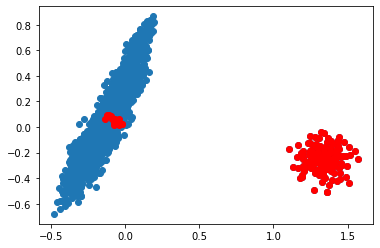

In [22]:
pred_labels_NEO, pred_outliers_NEO = run_NEO(data_out.T, path_to_NEO='/Users/olgadorabiala/Documents/ThesisResearch/PALM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , path_to_parameter_estimation='/Users/olgadorabiala/Documents/ThesisResearch/PALM/neo_k_means_vector/neo_kmeans/estimate_alpha_beta.m'
        , k=14, percent_outliers=.10, alpha = 3, init_centers = None)

outliers = np.where(pred_outliers_NEO == 0)


plt.figure()
plt.scatter(Xnew_out[0,:], Xnew_out[1,:])
plt.scatter(Xnew_out[0,outliers], Xnew_out[1,outliers], c= 'r')



# Yeast Noise KMOR

Text(0.5, 1.0, 'KMOR gamma = 9')

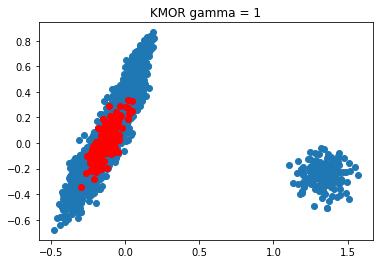

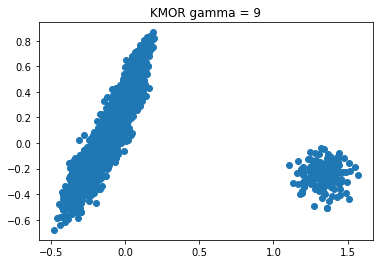

In [24]:
pred_labels_KMOR, pred_outliers_KMOR = run_KMOR(data_out.T, k=14, percent_outliers= 0.10, gamma = 1)#, init_centers = centers_record[:,:,2])

outliers_KMOR = np.where(pred_outliers_KMOR == 1)

plt.figure()
plt.scatter(Xnew_out[0,:], Xnew_out[1,:])
plt.scatter(Xnew_out[0,outliers_KMOR], Xnew_out[1,outliers_KMOR], c= 'r')
plt.title('KMOR gamma = 1')

pred_labels_KMOR, pred_outliers_KMOR = run_KMOR(data_out.T, k=14, percent_outliers= 0.10, gamma = 9)#, init_centers = centers_record[:,:,2])

outliers_KMOR = np.where(pred_outliers_KMOR == 1)

plt.figure()
plt.scatter(Xnew_out[0,:], Xnew_out[1,:])
plt.scatter(Xnew_out[0,outliers_KMOR], Xnew_out[1,outliers_KMOR], c= 'r')
plt.title('KMOR gamma = 9')


In [13]:
# np.save('yeastnoise_outliers_RTKM', outliers_RTKM)
# np.save('yeastnoise_outliers_NEO', outliers_NEO)
# np.save('yeastnoise_outliers_KMOR_1', outliers_KMOR_1)
# np.save('yeastnoise_outliers_KMOR_9', outliers_KMOR_9)

outliers_RTKM = np.load('yeastnoise_outliers_RTKM.npy')
outliers_NEO = np.load('yeastnoise_outliers_NEO.npy')
outliers_KMOR_1 = np.load('yeastnoise_outliers_KMOR_1.npy')
outliers_KMOR_9 = np.load('yeastnoise_outliers_KMOR_9.npy')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


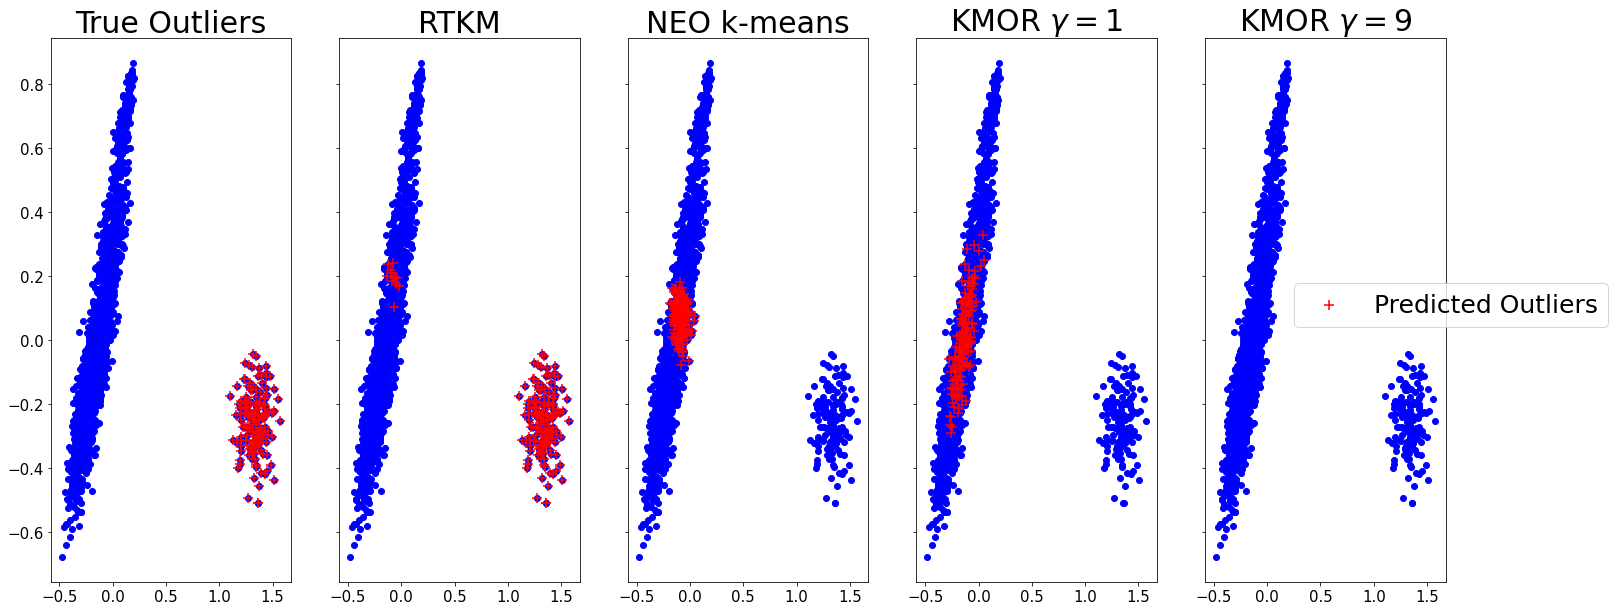

In [16]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharey=True, figsize = (25,10))

ax1.scatter(Xnew_out[0,:], Xnew_out[1,:], c = 'b')
ax1.scatter(Xnew_out[0,true_out], Xnew_out[1,true_out], c= 'r', marker = '+', s = 100, label = 'Outliers')
# ax1.legend(fontsize = 20)
ax1.set_title('True Outliers', fontsize = 30)
ax1.tick_params(axis='y', labelsize=15)
ax1.tick_params(axis='x', labelsize=15)


ax2.scatter(Xnew_out[0,:], Xnew_out[1,:], c = 'b')
ax2.scatter(Xnew_out[0,outliers_RTKM], Xnew_out[1,outliers_RTKM], c= 'r', marker = '+', s = 100, label ='Predicted Outliers')
ax2.set_title('RTKM', fontsize = 30)
ax2.tick_params(axis='x', labelsize=15)


ax3.scatter(Xnew_out[0,:], Xnew_out[1,:], c = 'b')
ax3.scatter(Xnew_out[0,outliers_NEO], Xnew_out[1,outliers_NEO], c= 'r', marker = '+', s = 100, label = 'Predicted Outliers')
ax3.set_title('NEO k-means', fontsize = 30)
ax3.tick_params(axis='x', labelsize=15)


ax4.scatter(Xnew_out[0,:], Xnew_out[1,:], c = 'b')
ax4.scatter(Xnew_out[0,outliers_KMOR_1], Xnew_out[1,outliers_KMOR_1], c= 'r', marker = '+', s = 100, label = 'Predicted Outliers')
ax4.set_title('KMOR $\gamma = 1$', fontsize = 30)
ax4.tick_params(axis='x', labelsize=15)


ax5.scatter(Xnew_out[0,:], Xnew_out[1,:], c = 'b')
ax5.scatter(Xnew_out[0,outliers_KMOR_9], Xnew_out[1,outliers_KMOR_9], c= 'r', marker = '+', s = 100, label = 'Predicted Outliers')
ax5.set_title('KMOR $\gamma = 9$', fontsize = 30)
ax5.tick_params(axis='x', labelsize=15)


for ax in [ax1, ax2, ax3, ax4, ax5]:
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', fontsize = 25)

plt.savefig('YeastPlusNoiseOutliers2.eps', format = 'eps' )
# fig.title('Yeast Dataset With Noise', fontsize= 20)


